<a href="https://colab.research.google.com/github/guillermocalderon2021/tfm-words-embeddings/blob/main/20Group_AnalisisDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>


<h1><font color='#12007a'>Analisis estadistico del dataset</font></h1>

</center>  

## Cargar el dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks/data/20_group/')

import pandas as pd
df = pd.read_csv("20newsgroup_preprocessed.csv", sep=';', usecols=['target', 'text','text_cleaned'])
df.head()

Mounted at /content/drive


,target,text,text_cleaned
0,alt.atheism,From: mathew <mathew@mantis.co.uk>\nSubject: A...,atheist resources addresses atheist organizati...
1,alt.atheism,From: mathew <mathew@mantis.co.uk>\nSubject: A...,begin pgp signed message introduction atheism ...
2,alt.atheism,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,article charley wingate writes well john quite...
3,alt.atheism,From: mathew <mathew@mantis.co.uk>\nSubject: R...,kings become philosophers philosophers become ...
4,alt.atheism,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...,article bob mcgwier writes however hate econom...


Hacemos el split del dataset en train, val y test

In [ ]:
from sklearn.model_selection import train_test_split

X_training, X_test, y_training, y_test = train_test_split(df[['text_cleaned','text']], df['target'], random_state=42, train_size = .80)

X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, random_state=42, train_size = .80)


print('tamaño del conjunto de entrenamiento: ', X_train.shape)
print('tamaño del conjunto de validación: ', X_val.shape)
print('tamaño del conjunto de test: ', X_test.shape)

tamaño del conjunto de entrenamiento:  (12049, 2)
tamaño del conjunto de validación:  (3013, 2)
tamaño del conjunto de test:  (3766, 2)


Vamos a mostrar algunas instancias (ejecuta esta celda varias veces para ver distintas instancias):

In [ ]:
import random
index = random.randint(0,X_train.shape[0])
print(index, X_train.iloc[index]['text'])
print(index, y_train.iloc[index])

10899 From: dante@shakala.com (Charlie Prael)
Subject: Re: Commercial mining activities on the moon

dietz@cs.rochester.edu (Paul Dietz) writes:

> Which merely evades the issue of why those lunatics are
> there at all (and, why their children would want to stay.)

Paul-- for the same reason that many other colonies are founded. Why not?

------------------------------------------------------------------
Charlie Prael  - dante@shakala.com 
Shakala BBS (ClanZen Radio Network) Sunnyvale, CA +1-408-734-2289

10899 sci.space


## Distribución de clases
Vamos a estudiar la distribución de las clases y también vamos a ver si esa distribución es igual en los tres splits.

### Distribución de clases

In [ ]:
data_train1 = y_train.value_counts().reset_index()
data_train1.columns = ['target', 'counts']

data_dev1 = y_val.value_counts().reset_index()
data_dev1.columns = ['target', 'counts']

data_test1 = y_test.value_counts().reset_index()
data_test1.columns = ['target', 'counts']

data_all = df["target"].value_counts().reset_index()
data_all.columns = ['target', 'counts']


print("Distribución de clases (training):", data_train1.to_dict())
print("Distribución de clases (validation):", data_dev1.to_dict())
print("Distribución de clases (test):", data_test1.to_dict())
print("Distribución de clases (completo):", data_all.to_dict())


Distribución de clases (training): {'target': {0: 'sci.crypt', 1: 'sci.space', 2: 'rec.sport.hockey', 3: 'rec.sport.baseball', 4: 'comp.sys.ibm.pc.hardware', 5: 'comp.os.ms-windows.misc', 6: 'sci.med', 7: 'misc.forsale', 8: 'sci.electronics', 9: 'comp.graphics', 10: 'comp.windows.x', 11: 'soc.religion.christian', 12: 'rec.autos', 13: 'rec.motorcycles', 14: 'comp.sys.mac.hardware', 15: 'talk.politics.guns', 16: 'talk.politics.mideast', 17: 'talk.politics.misc', 18: 'alt.atheism', 19: 'talk.religion.misc'}, 'counts': {0: 659, 1: 658, 2: 651, 3: 638, 4: 635, 5: 633, 6: 626, 7: 623, 8: 623, 9: 623, 10: 621, 11: 618, 12: 617, 13: 612, 14: 606, 15: 606, 16: 596, 17: 507, 18: 498, 19: 399}}
Distribución de clases (validation): {'target': {0: 'comp.sys.mac.hardware', 1: 'rec.autos', 2: 'comp.windows.x', 3: 'sci.med', 4: 'rec.motorcycles', 5: 'misc.forsale', 6: 'soc.religion.christian', 7: 'comp.os.ms-windows.misc', 8: 'comp.sys.ibm.pc.hardware', 9: 'rec.sport.hockey', 10: 'alt.atheism', 11: 'c

NameError: name 'data_train1' is not defined

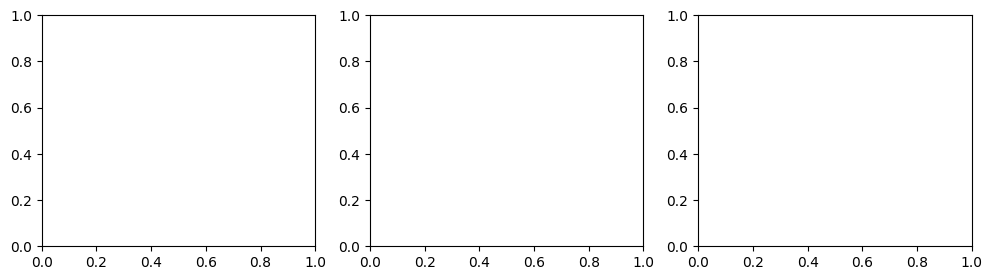

In [ ]:
import matplotlib.pyplot as plt

fig, (ax_train, ax_dev, ax_test) = plt.subplots(1, 3, figsize=(12, 3))
# fig.suptitle('Distribution of the languages in both subsets: training and test')
ax_train.bar(data_train1['target'], data_train1['counts'], width=0.4)
ax_train.set_xticklabels(data_train1['target'], rotation=90)
ax_train.set_title('Training')
ax_train.set_ylabel('Número de textos')

ax_dev.bar(data_dev1['target'], data_dev1['counts'], width=0.4)
ax_dev.set_xticklabels(data_dev1['target'], rotation=90)
ax_dev.set_title('Validación')

ax_test.bar(data_test1['target'], data_test1['counts'], width=0.4)
ax_test.set_xticklabels(data_test1['target'], rotation=90)
ax_test.set_title('Test')




Lo mismo ocurre, si mostramos el gráfico con la distribución de clases para todo el conjunto de datos.

<ipython-input-42-be6cddb1b1d3>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_all['target'], rotation=90)


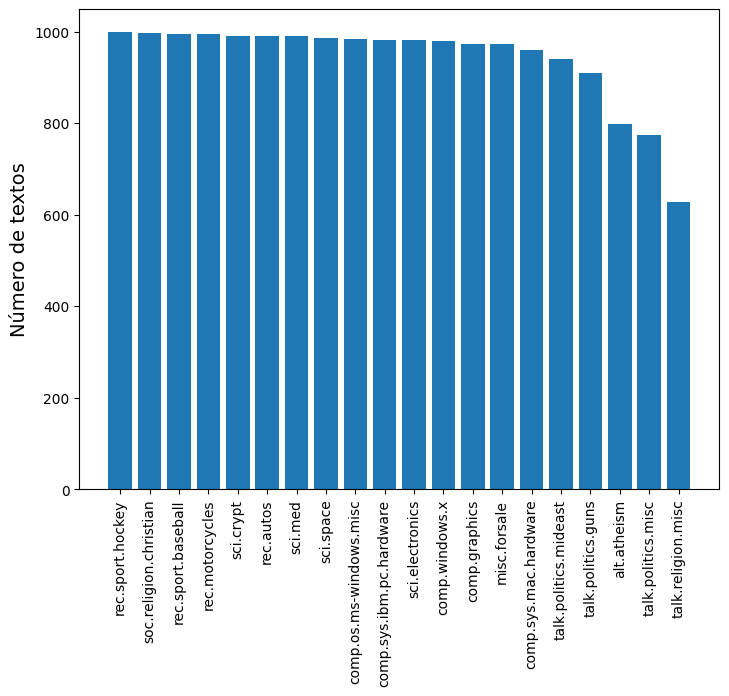

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(data_all['target'],data_all['counts'])
ax.set_ylabel('Número de textos', fontsize = 14)
ax.set_xticklabels(data_all['target'], rotation=90)
plt.set_cmap("gist_rainbow")
plt.show()




In [ ]:
data_train1

,target,counts
0,sci.crypt,659
1,sci.space,658
2,rec.sport.hockey,651
3,rec.sport.baseball,638
4,comp.sys.ibm.pc.hardware,635
5,comp.os.ms-windows.misc,633
6,sci.med,626
7,misc.forsale,623
8,sci.electronics,623
9,comp.graphics,623


## Distribución del tamaño de los textos (número de tokens)

Conocer el tamaño de los textos de entrada siempre es necesario para poder decidir qué tamaño de entrada vamos a usar para representar nuestros textos.


Vamos a añadir un nuevo campo a los dataframes y vamos a guardar en él, el número de tokens de su texto asociado.

Esto podríamos hacerlo con un tokenziador (y sería más correcto), sin embargo, el método split nos uede dar una estimación bastante acertada de cómo es la distribución de los números de tokens en los textos. Además, el método split es más eficiente que los tokenizadores, es decir, para obtener una estimación, es más que suficiente:


In [ ]:
df["length"]=df['text'].apply(lambda x: len(str(x).split()))

X_train["length"]=X_train['text'].apply(lambda x: len(x.split()))
X_val["length"]=X_val['text'].apply(lambda x: len(x.split()))
X_test["length"]=X_test['text'].apply(lambda x: len(x.split()))


In [ ]:
df['length'].describe(percentiles=[ 0.25, 0.50, 0.75, 0.95])

count    18828.000000
mean       272.494795
std        518.984480
min          5.000000
25%         96.000000
50%        164.000000
75%        282.000000
95%        744.000000
max      11795.000000
Name: length, dtype: float64

In [ ]:
X_train['length'].describe(percentiles=[0, 0.25, 0.50, 0.75, 0.95])

count    12049.000000
mean       273.346336
std        530.680968
min          5.000000
0%           5.000000
25%         95.000000
50%        164.000000
75%        282.000000
95%        737.000000
max      11252.000000
Name: length, dtype: float64

En el training, vemos un comportamiento muy similar en cuanto al tamaño de sus textos:  tamaño medio es de 23.4 tokens y una desviación de 11.6. El tamaño máximo es de 55 tokens, y el 75% de los textos tienen 33 o menos tokens.

In [ ]:
X_val['length'].describe(percentiles=[0, 0.25, 0.50, 0.75, 0.95])

count    3013.000000
mean      267.396615
std       460.792915
min         5.000000
0%          5.000000
25%        98.000000
50%       159.000000
75%       279.000000
95%       753.200000
max      8046.000000
Name: length, dtype: float64

In [ ]:
X_test['length'].describe(percentiles=[0, 0.25, 0.50, 0.75, 0.95])

count     3766.000000
mean       273.849177
std        525.154415
min          5.000000
0%           5.000000
25%         98.000000
50%        166.500000
75%        280.000000
95%        767.500000
max      11795.000000
Name: length, dtype: float64

En validación y test, también observamos valores muy parecidos.

Vamos a mostrar esta información en histogramas, que nos permitirá ver con mayor facilidad la distribución de las longitudes de los textos en los tres splits:

Text(0.5, 0, 'Número de tokens')

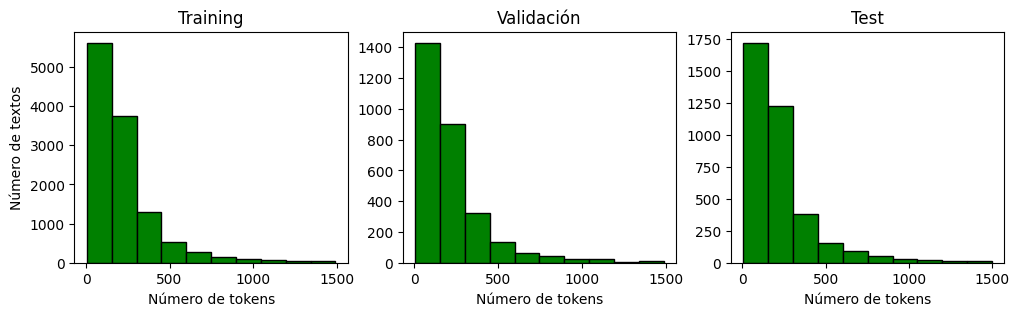

In [ ]:

fig, (ax_train, ax_dev, ax_test) = plt.subplots(1, 3, figsize=(12, 3))
# fig.suptitle('Distribución del tamaño de los textos')

ax_train.hist(X_train['length'].where(X_train['length']<1500),  color = 'green', edgecolor = 'black',
         )
ax_train.set_title('Training')
ax_train.set_xlabel('Número de tokens')
ax_train.set_ylabel('Número de textos')


ax_dev.hist(X_val['length'].where(X_val['length']<1500),  color = 'green', edgecolor = 'black',
         )
ax_dev.set_title('Validación')
ax_dev.set_xlabel('Número de tokens')

ax_test.hist(X_test['length'].where(X_test['length']<1500),  color = 'green', edgecolor = 'black',
         )
ax_test.set_title('Test')
ax_test.set_xlabel('Número de tokens')


Ahora mostramos el histrograma para toda la colección de textos:

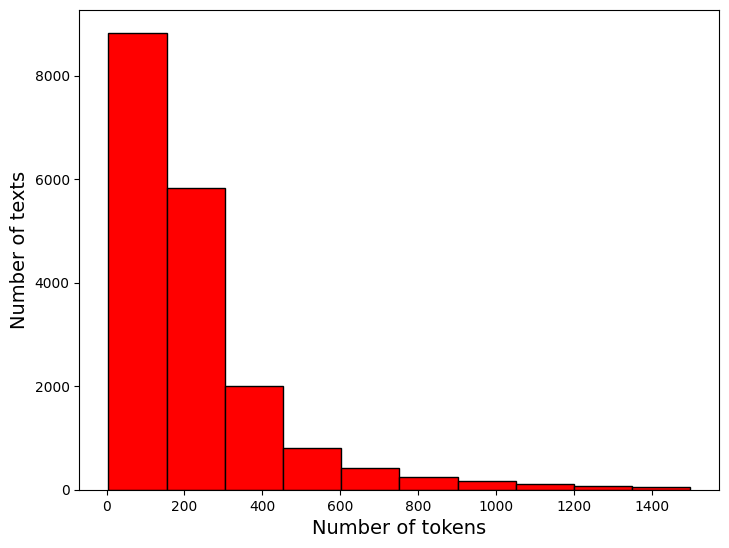

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(df['length'].where(df['length']<1500),  color = 'red', edgecolor = 'black',
         )
ax.set_xlabel('Number of tokens', fontsize=14)
ax.set_ylabel('Number of texts', fontsize=14)

plt.show()


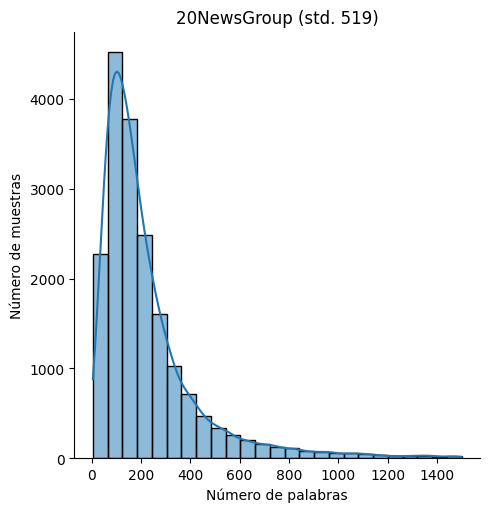

In [ ]:
import seaborn as sns

#create histogram with density curve overlaid
ax=sns.displot(df['length'].where(df['length']<1500), kde=True, bins=25)
ax.set(xlabel='Número de palabras', ylabel='Número de muestras', title='20NewsGroup (std. 519)')

Recuerda que también puedes utilizar la librería seaborn para mostrar este tipo de gráficos:

<ipython-input-24-4e49ebfce380>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['length'], hist=True, kde=True,


<Axes: xlabel='length', ylabel='Density'>

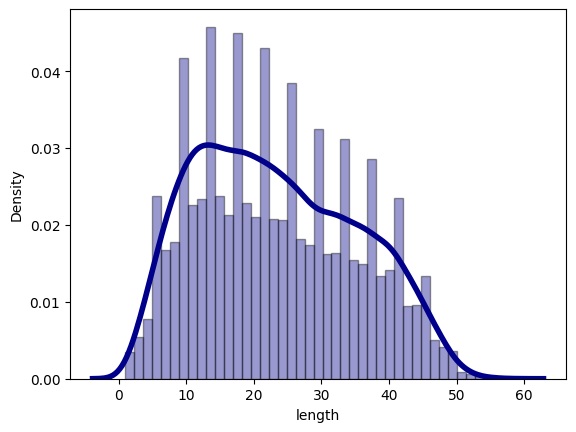

In [ ]:
import seaborn as sns

# Density Plot and Histogram of all lenghts of the tweets
sns.distplot(df['length'], hist=True, kde=True,
              color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

### Distribución de los tamaños de los textos en función del campo label_sexist



Como las tres divisiones parecen tener una distribución de longitud similar, creamos el gráfico de densidad únicamente para todo el conjunto de datos:


<ipython-input-25-1339e07fd22c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['length'], hist = False, kde = True,
<ipython-input-25-1339e07fd22c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['length'], hist = False, kde = True,


Text(0, 0.5, 'Densidad')

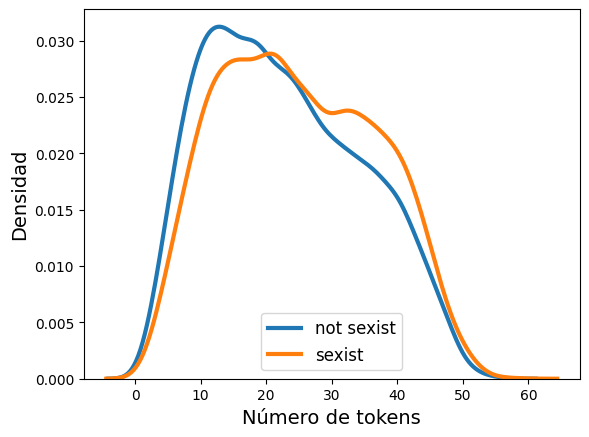

In [ ]:
labels = df["label_sexist"].unique()
for name in labels:
    # Subset to the language
    subset = df[df['label_sexist'] == name]

    # Draw the density plot
    sns.distplot(subset['length'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = name)


# Plot formatting
# plt.legend(prop={'size': 12}, title = 'Label')
plt.legend(prop={'size': 12}, loc="lower center")
# plt.title('Density Plot for sexist and non-sexist posts')
plt.xlabel('Número de tokens', fontsize=14)
plt.ylabel('Densidad', fontsize=14)

Podemos observar que la distribución del tamaño de los textos es muy similar en ambas clases: sexistas y no sexistas.
Por tanto, podemos decir que no hay diferencia en cuanto al número de tokens entre los textos sexistas y no sexistas.


### Distribución de los tamaños de los textos en función del campo label_category


<ipython-input-26-4bdba61dfebf>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['length'], hist = False, kde = True,
<ipython-input-26-4bdba61dfebf>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['length'], hist = False, kde = True,
<ipython-input-26-4bdba61dfe

Text(0, 0.5, 'Densidad')

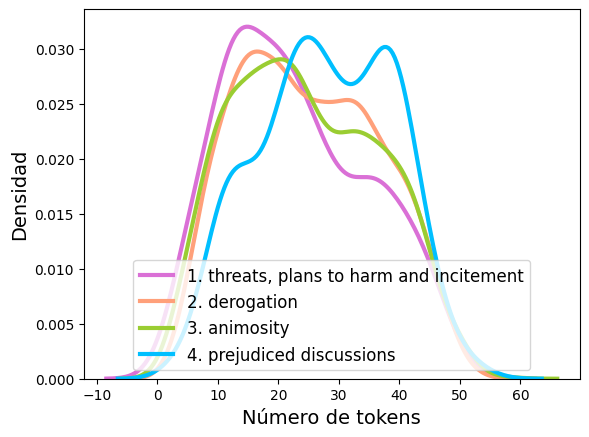

In [ ]:
df2 = df[df["label_category"]!='none']

labels = sorted(df2["label_category"].unique())
for name in labels:
    # Subset to the language
    subset = df2[df2['label_category'] == name]

    # Draw the density plot
    sns.distplot(subset['length'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = name, color = dict_color[name])

# Plot formatting
# plt.legend(prop={'size': 10}, title = 'Categories', bbox_to_anchor=(0.7, 0.8), loc="center left" )
# plt.legend(prop={'size': 12}, title = 'Categories', loc="lower center" )
plt.legend(prop={'size': 12}, loc="lower center" )
# plt.title('Density Plot for sexist texts per category (categories)')
plt.xlabel('Número de tokens', fontsize=14 )
plt.ylabel('Densidad', fontsize=14)

Podemos observar que los mensajes  clasificados como amenazas suelen ser más cortas que las clasificadas como discusiones prejuiciosas. Sin embargo, las publicaciones clasificadas con las categorías 2 y 3 tienen una distribución de longitud muy similar.

Así, podemos pensar que los mensajes clasificados en discusiones prejuiciosas suelen ser más largos que el resto de mensajes sexistas. Además, parece que las amenazas suelen ser más cortas que el resto de mensajes sexistas.


In [ ]:
df_threat = df2['length'].where(df2['label_category'] == '1. threats, plans to harm and incitement')
df_threat.describe()

count    443.000000
mean      22.909707
std       11.768736
min        2.000000
25%       13.000000
50%       21.000000
75%       32.000000
max       52.000000
Name: length, dtype: float64

In [ ]:
df_discus = df2['length'].where(df2['label_category'] == '4. prejudiced discussions')
df_discus.describe()



count    475.000000
mean      27.808421
std       10.907316
min        3.000000
25%       20.000000
50%       28.000000
75%       37.000000
max       54.000000
Name: length, dtype: float64

In [ ]:
df2["label_category"].unique()

array(['3. animosity', '2. derogation', '4. prejudiced discussions',
       '1. threats, plans to harm and incitement'], dtype=object)

In [ ]:
df_derogation = df2['length'].where(df2['label_category'] == '2. derogation')
df_derogation.describe()

count    4854.000000
mean       24.917800
std        11.642949
min         2.000000
25%        15.000000
50%        24.000000
75%        34.000000
max        58.000000
Name: length, dtype: float64

In [ ]:
df_animosity = df2['length'].where(df2['label_category'] == '3. animosity')
df_animosity.describe()

count    1665.000000
mean       24.590390
std        11.893928
min         2.000000
25%        15.000000
50%        23.000000
75%        34.000000
max        58.000000
Name: length, dtype: float64

### Distribución de los tamaños de los textos en función del campo label_vector

<ipython-input-79-d5ed57fbec29>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['length'], hist = False, kde = True,
<ipython-input-79-d5ed57fbec29>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['length'], hist = False, kde = True,
<ipython-input-79-d5ed57fbec

Text(0, 0.5, 'Densidad')

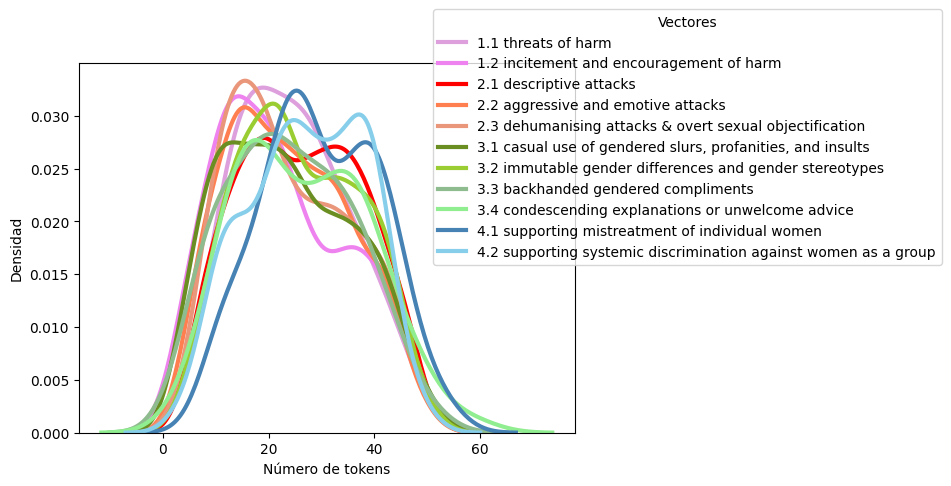

In [ ]:
labels = sorted(df2["label_vector"].unique())
for name in labels:
    # Subset to the language
    subset = df2[df2['label_vector'] == name]

    # Draw the density plot
    sns.distplot(subset['length'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = name, color = dict_color3[name])

# Plot formatting
plt.legend(prop={'size': 10}, title = 'Vectores', bbox_to_anchor=(0.7, 0.8), loc="center left" )
# plt.title('Density Plot for sexist texts per category (categories)')
plt.xlabel('Número de tokens')
plt.ylabel('Densidad')

Hay demasiadas subcategorías, por lo que es difícil mostrar la distribución. En este caso, sería mejor utilizar el método describe() de los marcos de datos. O tratar de ir comparando en subconjuntos más pequeños. Por ejemplo, aquí estamos tratando de comparar la longitud para las vectores de la categoría 4:

4.1 supporting mistreatment of individual women
count    107.000000
mean      29.841121
std       10.815912
min        9.000000
25%       22.000000
50%       28.000000
75%       39.000000
max       54.000000
Name: length, dtype: float64

4.2 supporting systemic discrimination against women as a group
count    368.000000
mean      27.217391
std       10.877145
min        3.000000
25%       19.000000
50%       27.000000
75%       37.000000
max       50.000000
Name: length, dtype: float64



<ipython-input-80-b066110ce3f7>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['length'], hist = False, kde = True,
<ipython-input-80-b066110ce3f7>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(subset['length'], hist = False, kde = True,


Text(0, 0.5, '')

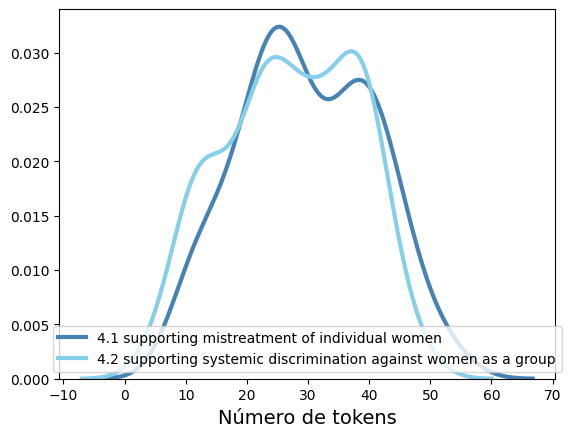

In [ ]:
labels = sorted(df2["label_vector"].unique())
for name in labels:
    if name.startswith('4'):
        print(name)
        # Subset to the language
        subset = df2[df2['label_vector'] == name]
        length = subset['length']
        print(length.describe())
        print()
        # Draw the density plot
        sns.distplot(subset['length'], hist = False, kde = True,
                    kde_kws = {'linewidth': 3},
                    label = name, color = dict_color3[name])

# Plot formatting
# plt.legend(prop={'size': 10}, title = 'Categories', bbox_to_anchor=(0.7, 0.8), loc="center left" )
plt.legend(prop={'size': 10}, loc="lower center" )
# plt.title('Density Plot for sexist texts per category (categories)')
plt.xlabel('Número de tokens', fontsize=14)
plt.ylabel('')

Podemos ver que no hay mucha diferencia en cuanto al tamaño de sus textos, en esas dos subcategorías (vectores): 4.1 y 4.2

En este notebook, hemos cargado el dataset de la competición EDOs y hemos estudiado su distribución de clases en cada split, y también la distribución de los tamaños de sus textos.


# Arxiv

In [ ]:

os.chdir('/content/drive/My Drive/Colab Notebooks/data/arxiv/')

df_papers = pd.read_csv('cs_papers_api.csv')
df_papers.head()

,paper_id,title,abstract,year,primary_category,categories
0,2301.02657v1,TarViS: A Unified Approach for Target-based Vi...,The general domain of video segmentation is cu...,2023-01-06 18:59:52+00:00,cs.CV,cs.CV cs.AI cs.LG
1,2301.02642v1,Triple-stream Deep Metric Learning of Great Ap...,We propose the first metric learning system fo...,2023-01-06 18:36:04+00:00,cs.CV,cs.CV cs.AI cs.LG
2,2301.02610v1,Feedback-Gated Rectified Linear Units,Feedback connections play a prominent role in ...,2023-01-06 17:14:11+00:00,cs.NE,cs.NE cs.AI
3,2301.02593v1,Multi-Agent Reinforcement Learning for Fast-Ti...,To integrate high amounts of renewable energy ...,2023-01-06 16:41:51+00:00,cs.MA,cs.MA cs.AI cs.LG cs.SY
4,2301.02561v1,Multi-Vehicle Trajectory Prediction at Interse...,Traditional approaches to prediction of future...,2023-01-06 15:13:23+00:00,cs.RO,cs.RO cs.AI


In [ ]:
df_papers.describe()

,paper_id,title,abstract,year,primary_category,categories
count,200094,200094,200094,200094,200094,200094
unique,200094,199390,199643,199898,40,8217
top,2301.02657v1,Towards Building Text-To-Speech Systems for th...,This paper has been withdrawn,2012-02-14 16:41:17+00:00,cs.LG,cs.IT
freq,1,2,7,10,19312,6576


In [ ]:
df_papers["length"]=df_papers['abstract'].apply(lambda x: len(str(x).split()))

In [ ]:
df_papers['length'].describe(percentiles=[0, 0.25, 0.50, 0.75, 0.95])

count    200094.000000
mean        163.749213
std          57.849878
min           3.000000
0%            3.000000
25%         123.000000
50%         162.000000
75%         202.000000
95%         264.000000
max         567.000000
Name: length, dtype: float64

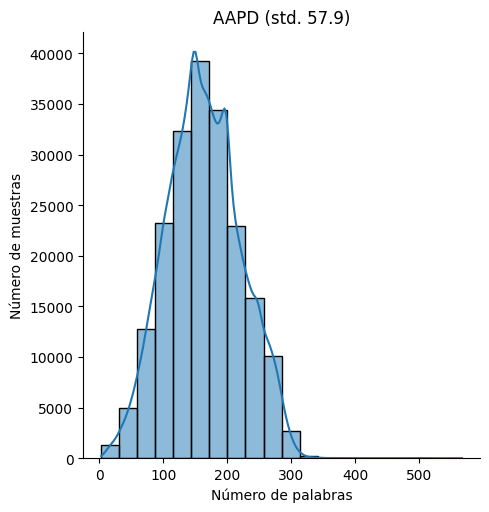

In [ ]:


#create histogram with density curve overlaid

ax=sns.displot(df_papers['length'], kde=True, bins=20)
ax.set(xlabel='Número de palabras', ylabel='Número de muestras', title='AAPD (std. 57.9)')

In [ ]:
from sklearn.model_selection import train_test_split

X_training, X_test, y_training, y_test = train_test_split(df_papers[['title','abstract']], df_papers['categories'], random_state=42, train_size = .80)

X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, random_state=42, train_size = .80)


print('tamaño del conjunto de entrenamiento: ', X_train.shape)
print('tamaño del conjunto de validación: ', X_val.shape)
print('tamaño del conjunto de test: ', X_test.shape)

tamaño del conjunto de entrenamiento:  (128060, 2)
tamaño del conjunto de validación:  (32015, 2)
tamaño del conjunto de test:  (40019, 2)


In [ ]:
df_papers["length"]=df_papers['abstract'].apply(lambda x: len(str(x).split()))

X_train["length"]=X_train['abstract'].apply(lambda x: len(x.split()))
X_val["length"]=X_val['abstract'].apply(lambda x: len(x.split()))
X_test["length"]=X_test['abstract'].apply(lambda x: len(x.split()))

In [ ]:
df_papers['length'].describe(percentiles=[ 0.25, 0.50, 0.75, 0.95])

count    200094.000000
mean        163.749213
std          57.849878
min           3.000000
25%         123.000000
50%         162.000000
75%         202.000000
95%         264.000000
max         567.000000
Name: length, dtype: float64

In [ ]:
X_train.describe(percentiles=[ 0.25, 0.50, 0.75, 0.95])

,length
count,128060.000000
mean,163.682196
std,57.899901
min,4.000000
25%,123.000000
50%,162.000000
75%,202.000000
95%,264.000000
max,567.000000


In [ ]:
X_val.describe(percentiles=[ 0.25, 0.50, 0.75, 0.95])

,length
count,32015.000000
mean,163.941809
std,57.810323
min,3.000000
25%,124.000000
50%,162.000000
75%,202.000000
95%,264.000000
max,430.000000


In [ ]:
X_test.describe(percentiles=[ 0.25, 0.50, 0.75, 0.95])

,length
count,40019.000000
mean,163.809590
std,57.722259
min,3.000000
25%,123.000000
50%,162.000000
75%,202.000000
95%,264.000000
max,496.000000


Text(0.5, 0, 'Número de tokens')

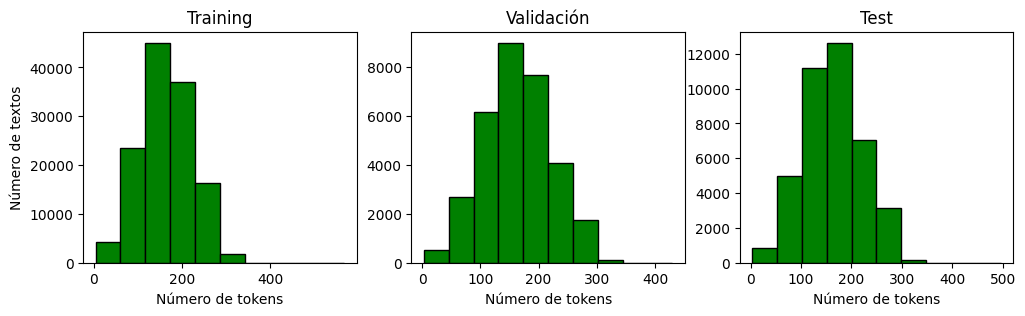

In [ ]:
import matplotlib.pyplot as plt
fig, (ax_train, ax_dev, ax_test) = plt.subplots(1, 3, figsize=(12, 3))
# fig.suptitle('Distribución del tamaño de los textos')

ax_train.hist(X_train['length'],  color = 'green', edgecolor = 'black',
         )
ax_train.set_title('Training')
ax_train.set_xlabel('Número de tokens')
ax_train.set_ylabel('Número de textos')


ax_dev.hist(X_val['length'],  color = 'green', edgecolor = 'black',
         )
ax_dev.set_title('Validación')
ax_dev.set_xlabel('Número de tokens')

ax_test.hist(X_test['length'],  color = 'green', edgecolor = 'black',
         )
ax_test.set_title('Test')
ax_test.set_xlabel('Número de tokens')

In [ ]:
df_papers["numet"]=df_papers["categories"].apply(lambda x: len(str(x).split()))

X_train["numet"]=y_train.apply(lambda x: len(x.split()))
X_val["numet"]=y_val.apply(lambda x: len(x.split()))
X_test["numet"]=y_test.apply(lambda x: len(x.split()))

In [ ]:
prueba=df_papers["numet"].value_counts()
prueba1=X_train["numet"].value_counts()
prueba2=X_val["numet"].value_counts()
prueba3=X_test["numet"].value_counts()



In [ ]:
print(prueba)

numet
1    99810
2    68565
3    25329
4     5457
5      909
6       21
7        3
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x7c2da6abed10>,
 [Text(0.00406724941173859, 1.0999924806480375, '1'),
  Text(-0.5289742835690101, -0.9644616152665967, '2'),
  Text(0.908955866288131, -0.6195153211506506, '3'),
  Text(1.0927490588689814, -0.12609319704470848, '4'),
  Text(1.0998773832370357, -0.016423819399007816, '5'),
  Text(1.0999999402725724, -0.0003624918446798702, '6')],
 [Text(0.00221849967913014, 0.599995898535293, '49.9%'),
  Text(-0.28853142740127824, -0.5260699719635982, '34.3%'),
  Text(0.49579410888443504, -0.3379174479003548, '12.7%'),
  Text(0.5960449412012625, -0.06877810747893189, '2.7%'),
  Text(0.5999331181292921, -0.008958446944913353, '0.5%'),
  Text(0.599999967421403, -0.00019772282437083828, '0.0%')])

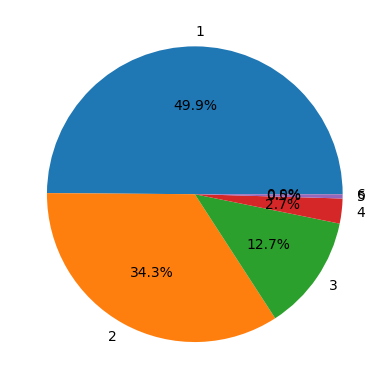

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.pie(prueba[0:6], labels=range(1,7), autopct='%1.1f%%')

Text(0.5, 1.0, 'Test')

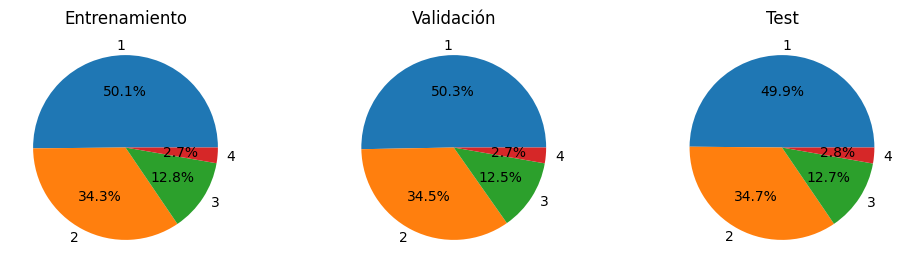

In [ ]:
import matplotlib.pyplot as plt
fig, (ax_train, ax_dev, ax_test) = plt.subplots(1, 3, figsize=(12, 3))
# fig.suptitle('Distribución del tamaño de los textos')

ax_train.pie(prueba1[0:4], labels=range(1,5), autopct='%1.1f%%')
ax_train.set_title('Entrenamiento')


ax_dev.pie(prueba2[0:4], labels=range(1,5), autopct='%1.1f%%')
ax_dev.set_title('Validación')

ax_test.pie(prueba3[0:4], labels=range(1,5), autopct='%1.1f%%')
ax_test.set_title('Test')
